<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be performing data wrangling.


## Objectives


In this lab you will perform the following:


-   Identify duplicate values in the dataset.

-   Remove duplicate values from the dataset.

-   Identify missing values in the dataset.

-   Impute the missing values in the dataset.

-   Normalize data in the dataset.


<hr>


## Hands on Lab


Import pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [34]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")
df.head(100)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,209,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A humanities discipline (ex. literature, histo...",...,Just as welcome now as I felt last year,Tech meetups or events in your area,33.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
96,211,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,United States,No,Associate degree,Web development or web design,...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,30.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
97,212,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed part-time,Netherlands,"Yes, part-time",NaN,Web development or web design,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,30.0,Man,No,Straight / Heterosexual,White or of European descent,No,Too long,Neither easy nor difficult
98,213,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Arab Emirates,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,41.0,Man,No,Stra

## Finding duplicates


In this section you will identify duplicate values in the dataset.


 Find how many duplicate rows exist in the dataframe.


In [3]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 154


## Removing duplicates


Remove the duplicate rows from the dataframe.


In [9]:
df_no_duplicates = df.drop_duplicates()

Verify if duplicates were actually dropped.


In [8]:
print("Shape of the original dataframe:", df.shape)

print("Shape of the dataframe after removing duplicates:", df_no_duplicates.shape)

Shape of the original dataframe: (11552, 85)
Shape of the dataframe after removing duplicates: (11398, 85)


## Finding Missing values


Find the missing values for all columns.


In [10]:
missing_values = df.isnull().sum()
print("Missing values for each column:")
print(missing_values)

Missing values for each column:
Respondent        0
MainBranch        0
Hobbyist          0
OpenSourcer       0
OpenSource       81
               ... 
Sexuality       547
Ethnicity       683
Dependents      144
SurveyLength     19
SurveyEase       14
Length: 85, dtype: int64


Find out how many rows are missing in the column 'WorkLoc'


In [12]:
missing_workloc = df['WorkLoc'].isnull().sum()
print("Number of missing values in the 'WorkLoc' column:", missing_workloc)

Number of missing values in the 'WorkLoc' column: 32


## Imputing missing values


Find the  value counts for the column WorkLoc.


In [13]:
workloc_value_counts = df['WorkLoc'].value_counts()
print("Value counts for the 'WorkLoc' column:")
print(workloc_value_counts)

Value counts for the 'WorkLoc' column:
Office                                            6905
Home                                              3638
Other place, such as a coworking space or cafe     977
Name: WorkLoc, dtype: int64


Identify the value that is most frequent (majority) in the WorkLoc column.


In [14]:
workloc_value_counts = df['WorkLoc'].value_counts()

most_frequent_workloc = workloc_value_counts.idxmax()

print("Most frequent value in the 'WorkLoc' column:", most_frequent_workloc)


Most frequent value in the 'WorkLoc' column: Office


Impute (replace) all the empty rows in the column WorkLoc with the value that you have identified as majority.


In [15]:
most_frequent_workloc = df['WorkLoc'].value_counts().idxmax()

df['WorkLoc'] = df['WorkLoc'].fillna(most_frequent_workloc)

print("Number of missing values in the 'WorkLoc' column after imputation:", df['WorkLoc'].isnull().sum())


Number of missing values in the 'WorkLoc' column after imputation: 0


After imputation there should ideally not be any empty rows in the WorkLoc column.


Verify if imputing was successful.


In [16]:
# Verify the number of missing values in the 'WorkLoc' column after imputation
missing_workloc_after_imputation = df['WorkLoc'].isnull().sum()

if missing_workloc_after_imputation == 0:
    print("Imputation was successful. No missing values in the 'WorkLoc' column.")
else:
    print("Imputation was not successful. Number of missing values in the 'WorkLoc' column:", missing_workloc_after_imputation)


Imputation was successful. No missing values in the 'WorkLoc' column.


## Normalizing data


There are two columns in the dataset that talk about compensation.

One is "CompFreq". This column shows how often a developer is paid (Yearly, Monthly, Weekly).

The other is "CompTotal". This column talks about how much the developer is paid per Year, Month, or Week depending upon his/her "CompFreq". 

This makes it difficult to compare the total compensation of the developers.

In this section you will create a new column called 'NormalizedAnnualCompensation' which contains the 'Annual Compensation' irrespective of the 'CompFreq'.

Once this column is ready, it makes comparison of salaries easy.


<hr>


List out the various categories in the column 'CompFreq'


In [17]:
compfreq_categories = df['CompFreq'].unique()

print("Categories in the 'CompFreq' column:")
print(compfreq_categories)


Categories in the 'CompFreq' column:
['Yearly' 'Monthly' 'Weekly' nan]


Create a new column named 'NormalizedAnnualCompensation'. Use the hint given below if needed.


Double click to see the **Hint**.

<!--

Use the below logic to arrive at the values for the column NormalizedAnnualCompensation.

If the CompFreq is Yearly then use the exising value in CompTotal
If the CompFreq is Monthly then multiply the value in CompTotal with 12 (months in an year)
If the CompFreq is Weekly then multiply the value in CompTotal with 52 (weeks in an year)

-->


In [18]:
df['NormalizedAnnualCompensation'] = df.apply(lambda row: row['CompTotal'] if row['CompFreq'] == 'Yearly' else (row['CompTotal'] * 12) if row['CompFreq'] == 'Monthly' else (row['CompTotal'] * 52) if row['CompFreq'] == 'Weekly' else None, axis=1)

print(df[['CompFreq', 'CompTotal', 'NormalizedAnnualCompensation']].head())

  CompFreq  CompTotal  NormalizedAnnualCompensation
0   Yearly    61000.0                       61000.0
1   Yearly   138000.0                      138000.0
2   Yearly    90000.0                       90000.0
3  Monthly    29000.0                      348000.0
4   Yearly    90000.0                       90000.0


What is the median Age of survey respondents?     

In [19]:
median_age = df['Age'].median()

print("Median Age of survey respondents:", median_age)


Median Age of survey respondents: 29.0


What is the median ConvertedComp of  respondents who have identified themselves as ‘Woman’? 

In [33]:
woman_bisexual_df = df[(df['Gender'] == 'Woman') & (df['Sexuality'] == 'Bisexual')]

median_converted_comp_woman_bisexual = woman_bisexual_df['ConvertedComp'].median()

print("Median ConvertedComp of respondents who identify as 'Woman' and have 'Bisexual' sexuality:", median_converted_comp_woman_bisexual)


Median ConvertedComp of respondents who identify as 'Woman' and have 'Bisexual' sexuality: 65424.0


Based on the histogram, which age group has the highest number of survey respondents?

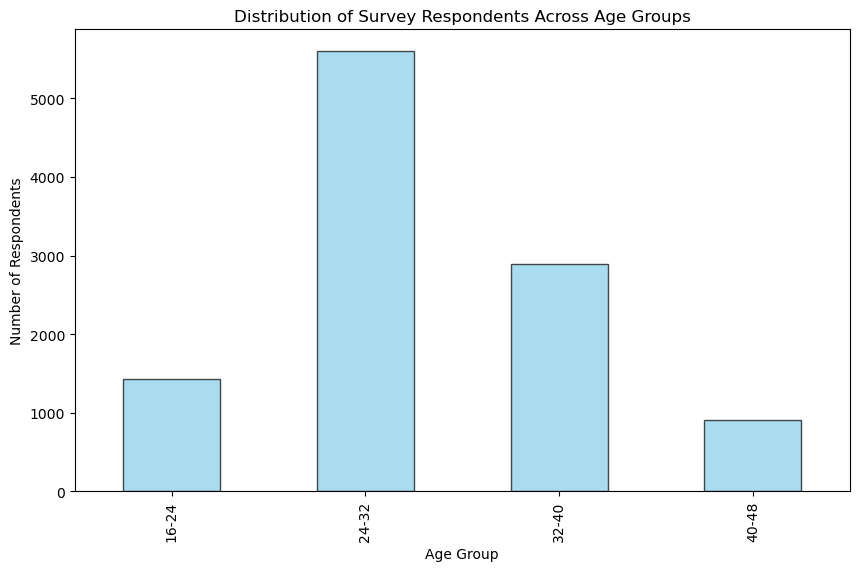

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")

age_bins = [16, 24, 32, 40, 48]
age_labels = ['16-24', '24-32', '32-40', '40-48']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(10, 6))
df['AgeGroup'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Survey Respondents Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.show()


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
